## Predicting the stock market

###  Introduction

This project aim to make predictions about future prices based on the historical data on the price of the S&P500 Index.This prediction will help to forecast how the stock market as a whole will performs.

The S&P500 is a stock market index. A stock index or stock market index is an index that measures the stock market or a subset of the stock market, that helps investors compare current price levels with past prices to calculate market performance

Each row in the a daily record of the price of the S&P500 Index from 1950 to 2015. The dataset is stored in sphist.csv.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stock_df = pd.read_csv("sphist.csv")
stock_df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,4.043820e+09,2077.070068
1,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941
2,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117
3,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010
4,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883


In [3]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16590 entries, 0 to 16589
Data columns (total 7 columns):
Date         16590 non-null object
Open         16590 non-null float64
High         16590 non-null float64
Low          16590 non-null float64
Close        16590 non-null float64
Volume       16590 non-null float64
Adj Close    16590 non-null float64
dtypes: float64(6), object(1)
memory usage: 907.3+ KB


In [4]:
### converting date column into pd.to_datetime this will allow to date comparisons with the column

stock_df['Date'] =  pd.to_datetime(stock_df['Date'])
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16590 entries, 0 to 16589
Data columns (total 7 columns):
Date         16590 non-null datetime64[ns]
Open         16590 non-null float64
High         16590 non-null float64
Low          16590 non-null float64
Close        16590 non-null float64
Volume       16590 non-null float64
Adj Close    16590 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 907.3 KB


In [5]:
## sort the df on the Date column
stock_df.sort_values("Date", ascending=True, inplace=True)
stock_df.reset_index(drop=True, inplace=True)
stock_df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,1950-01-03,16.66,16.66,16.66,16.66,1260000.0,16.66
1,1950-01-04,16.85,16.85,16.85,16.85,1890000.0,16.85
2,1950-01-05,16.93,16.93,16.93,16.93,2550000.0,16.93
3,1950-01-06,16.98,16.98,16.98,16.98,2010000.0,16.98
4,1950-01-09,17.08,17.08,17.08,17.08,2520000.0,17.08


#### Generating Indicators

Generating indicators makes our model accurate. we can create a new column that contains average price of the last 10 trades and make multiple rows into one. For doing average calculation not going to include the current price, by this teaching the model to predict the current price from the historical prices.

- The average price from the past 5 days.
- The average price for the past 30 days.
- The average price for the past 365 days.

The "price" means "close" column and the days here is number of trading days.

Calculating the average price by using pandas tool "__window__". Set the window equal to the number of trading days in the past to compute the indicators

In [6]:
### Generating Indicators
stock_df['Av_days_5'] = stock_df["Close"].rolling(5).mean().shift(1)
stock_df['Av_days_30'] = stock_df['Close'].rolling(30).mean().shift(1)
stock_df['Av_days_365'] = stock_df['Close'].rolling(365).mean().shift(1)

The standard deviation of the price over the past 5 days.
The standard deviation of the price over the past 365 days.

In [7]:
stock_df["std_5"] = stock_df["Close"].rolling(5).std().shift(1)
stock_df["std365"] = stock_df["Close"].rolling(5).std().shift(1)

- The ratio between the average price for the past 5 days, and the average price for the past 365 days.
- The ratio between the standard deviation for the past 5 days, and the standard deviation for the past 365 days.

In [8]:
stock_df["avg_ratio_5_365"] = stock_df['Av_days_5'] / stock_df['Av_days_365']
stock_df["ratio_std5_std365"]= stock_df["std_5"] / stock_df["std365"] 

In [9]:
stock_df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Av_days_5,Av_days_30,Av_days_365,std_5,std365,avg_ratio_5_365,ratio_std5_std365
0,1950-01-03,16.66,16.66,16.66,16.66,1260000.0,16.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1950-01-04,16.85,16.85,16.85,16.85,1890000.0,16.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1950-01-05,16.93,16.93,16.93,16.93,2550000.0,16.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1950-01-06,16.98,16.98,16.98,16.98,2010000.0,16.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1950-01-09,17.08,17.08,17.08,17.08,2520000.0,17.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
stock_df.dropna(axis=0, inplace=True)
stock_df.isnull().sum()

Date                 0
Open                 0
High                 0
Low                  0
Close                0
Volume               0
Adj Close            0
Av_days_5            0
Av_days_30           0
Av_days_365          0
std_5                0
std365               0
avg_ratio_5_365      0
ratio_std5_std365    0
dtype: int64

In [11]:
stock_df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Av_days_5,Av_days_30,Av_days_365,std_5,std365,avg_ratio_5_365,ratio_std5_std365
365,1951-06-19,22.020000,22.020000,22.020000,22.020000,1100000.0,22.020000,21.800,21.703333,19.447726,0.256223,0.256223,1.120954,1.0
366,1951-06-20,21.910000,21.910000,21.910000,21.910000,1120000.0,21.910000,21.900,21.683000,19.462411,0.213659,0.213659,1.125246,1.0
367,1951-06-21,21.780001,21.780001,21.780001,21.780001,1100000.0,21.780001,21.972,21.659667,19.476274,0.092574,0.092574,1.128142,1.0
368,1951-06-22,21.549999,21.549999,21.549999,21.549999,1340000.0,21.549999,21.960,21.631000,19.489562,0.115108,0.115108,1.126757,1.0
369,1951-06-25,21.290001,21.290001,21.290001,21.290001,2440000.0,21.290001,21.862,21.599000,19.502082,0.204132,0.204132,1.121008,1.0


In [12]:
##Create train and test dataframes
train_df = stock_df[stock_df['Date'] < datetime(year=2013, month=1,day=1)]
test_df = stock_df[stock_df['Date']>= datetime(year=2013, month=1,day=1)]

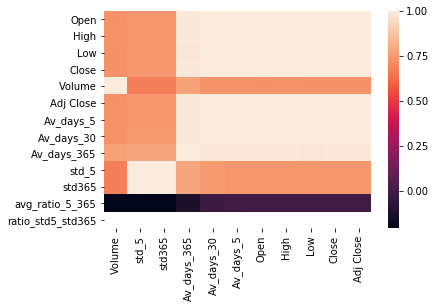

In [13]:
strong_corr= train_df.corr()
corrmat= strong_corr['Close'].abs().sort_values()
str_cormat = corrmat[corrmat>0.4]
strong_corr = strong_corr[str_cormat.index]
sns.heatmap(strong_corr)

To avoid data leakage leave out all of the original columns Close, High, Low, Open, Volume, Adj Close, Date. When training the model these all contain knowledge of the future that you don't want to feed the model.

In [14]:
lr=LinearRegression()
features = ['Av_days_5','Av_days_30','Av_days_365','std_5','std365','avg_ratio_5_365']
target= 'Close'
lr.fit(train_df[features], train_df[target])
predictions= lr.predict(test_df[features])
## Calculate error metrics
mse= mean_squared_error(predictions, test_df[target])
mae = mean_absolute_error(test_df[target], predictions)
print("MAE: ", mae)
print("MSE: ", mse)

MAE:  16.12909806630855
MSE:  492.8198805123851


#### Improving errors

We can improve the model significantly by adding some indicators like

- The average volume over the past five days.
- The average volume over the past year.
- The ratio between the average volume for the past five days


In [15]:
stock_df["ave_volume_5d"] =  stock_df['Av_days_5'].rolling(5).mean().shift(1)
stock_df["ave_5yrs"]= stock_df['Close'].rolling(5).mean().shift(1)
stock_df["ave_volume_5yr"] = stock_df["ave_5yrs"].rolling(5).mean().shift(1)
stock_df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Av_days_5,Av_days_30,Av_days_365,std_5,std365,avg_ratio_5_365,ratio_std5_std365,ave_volume_5d,ave_5yrs,ave_volume_5yr
365,1951-06-19,22.020000,22.020000,22.020000,22.020000,1100000.0,22.020000,21.800,21.703333,19.447726,0.256223,0.256223,1.120954,1.0,NaN,NaN,NaN
366,1951-06-20,21.910000,21.910000,21.910000,21.910000,1120000.0,21.910000,21.900,21.683000,19.462411,0.213659,0.213659,1.125246,1.0,NaN,NaN,NaN
367,1951-06-21,21.780001,21.780001,21.780001,21.780001,1100000.0,21.780001,21.972,21.659667,19.476274,0.092574,0.092574,1.128142,1.0,NaN,NaN,NaN
368,1951-06-22,21.549999,21.549999,21.549999,21.549999,1340000.0,21.549999,21.960,21.631000,19.489562,0.115108,0.115108,1.126757,1.0,NaN,NaN,NaN
369,1951-06-25,21.290001,21.290001,21.290001,21.290001,2440000.0,21.290001,21.862,21.599000,19.502082,0.204132,0.204132,1.121008,1.0,NaN,NaN,NaN


- The standard deviation of the average volume over the past five days.
- The standard deviation of the average volume over the past year.

In [19]:
stock_df['std_5days_vol'] = stock_df["ave_volume_5d"].rolling(5).std().shift(1)
stock_df['std_5years_vol'] = stock_df["ave_volume_5yr"].rolling(5).std().shift(1)

- The ratio between the average volume for the past five days, and the average volume for the past year.

In [20]:
stock_df['ratio_ave_vol'] = stock_df['ave_volume_5d'] / stock_df['ave_volume_5yr']


The ratio between the standard deviation of the average volume for the past five days, and the standard deviation of the average volume for the past year.

In [21]:
stock_df['ratio_std_vol'] = stock_df['std_5days_vol'] / stock_df['std_5years_vol']

In [22]:
stock_df.dropna(axis=0, inplace=True)
stock_df.isnull().sum()

Date                 0
Open                 0
High                 0
Low                  0
Close                0
Volume               0
Adj Close            0
Av_days_5            0
Av_days_30           0
Av_days_365          0
std_5                0
std365               0
avg_ratio_5_365      0
ratio_std5_std365    0
ave_volume_5d        0
ave_5yrs             0
ave_volume_5yr       0
std_5days_vol        0
std_5years_vol       0
ratio_ave_vol        0
ratio_std_vol        0
dtype: int64

C:\Users\Akshaya_Aadithya\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


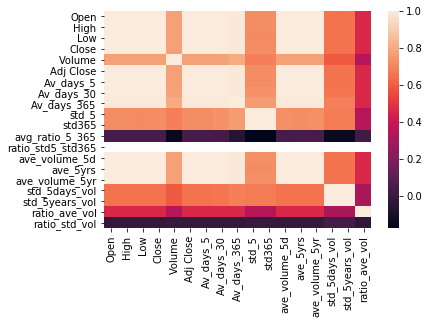

In [23]:
corr= stock_df.corr()
coorm = corr['Close'].abs().sort_values()
str_cormat = corr[coorm >0.4]
corr = corr[str_cormat.index]
sns.heatmap(corr)


In [ ]:
stock_df.head()

In [24]:
train = stock_df[stock_df['Date'] < datetime(year=2013, month=1, day=1)]
test = stock_df[stock_df['Date']>= datetime(year=2013, month=1,day=1)]


In [25]:
lr = LinearRegression()
features = ['Av_days_5','Av_days_30','Av_days_365','std_5','std365','avg_ratio_5_365','ave_volume_5d','ave_volume_5yr','std_5days_vol','std_5years_vol','ratio_ave_vol']
target =['Close']
lr.fit(train[features], train[target])
predict = lr.predict(test[features])

## calculating mse

mse = mean_squared_error(test[target],predict)
mae = mean_absolute_error(test_df[target], predictions)
print("MAE: " , mae)
print("MSE: ", mse)

MAE:  16.12909806630855
MSE:  443.264999365545
